En la siguiente presentación se mostraran los resultados de analizar las distintas empresas que conforman el índice SP500 a lo largo del tiempo para recomendar las mejores empresas, y poder tomar decisiones en base a nuestras recomendaciones.

Librerías usadas en el desarrollo:

In [2]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd 
import yfinance as yf
import datetime
import plotly.express as px
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
#import plotly.express as px

In [19]:
cargaticker = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = pd.DataFrame(cargaticker[0])
df['Symbol'] = df['Symbol'].str.replace(".", "-")
tickers_symbols = df['Symbol'].values.tolist()
GICS_sectors = df['GICS Sector'].values.tolist()

data = pd.DataFrame()
for t,s in zip(tickers_symbols, GICS_sectors):
    tmp = yf.download(t, start='2000-01-01', end='2021-12-31', progress=False)
    tmp.reset_index(inplace=True)
    tmp['Ticker'] = t
    tmp['GICS'] = s
    data = data.append(tmp, ignore_index=True)

data.to_csv('stock_prices.csv', sep=',')

C:\Users\andre\AppData\Local\Temp\ipykernel_10116\790923517.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Symbol'] = df['Symbol'].str.replace(".", "-")
C:\Users\andre\AppData\Local\Temp\ipykernel_10116\790923517.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_10116\790923517.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_10116\790923517.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat


1 Failed download:
- CEG: Data doesn't exist for startDate = 946695600, endDate = 1640919600


C:\Users\andre\AppData\Local\Temp\ipykernel_10116\790923517.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_10116\790923517.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_10116\790923517.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_10116\790923517.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users\andre\AppDa

In [21]:
data = pd.read_csv("stock_prices.csv")
data = data.drop(["Unnamed: 0"], axis=1)

In [22]:
data['day_of_week'] = data['Date'].apply(pd.to_datetime).dt.dayofweek

In [23]:
data['r_intra'] =data.apply(
    lambda row: np.log(row.Close/row.Open), axis=1).fillna(0)

In [24]:
data['close2']=data.shift(periods=1).Close

In [25]:
data['r_gap'] = data.apply(lambda row: np.log(row.Open/row.close2), axis = 1).fillna(0)

In [26]:
for i in range(0,data.shape[0]-1):
    if data.loc[i,'Ticker']!= data.loc[i+1,'Ticker']:
            data['r_gap'][i+1] = 0

C:\Users\andre\AppData\Local\Temp\ipykernel_10116\978449100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['r_gap'][i+1] = 0


In [27]:
data.drop(columns='close2', inplace=True)

In [28]:
#compara adj close con el anterior y devuelve su diferencia porcentual.
data['var'] =data["Adj Close"].pct_change()

In [44]:
data.to_csv('stock_prices_2.csv', sep=',')

In [3]:
data = pd.read_csv("stock_prices_2.csv")
data = data.drop(["Unnamed: 0"], axis=1)

In [4]:
data['var log'] =np.log(data["Adj Close"]).diff()
data['var'].fillna(0, inplace=True)
data['var log'].fillna(0, inplace=True)
data['Volatility'] = (data['var'].rolling(250).std() * 100 *  (250)**0.5).fillna(0)


In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,day_of_week,r_intra,r_gap,var,var log,Volatility
0,2000-01-03 00:00:00,48.03125,48.25000,47.03125,47.1875,26.434853,2173400.0,MMM,Industrials,0,-0.017723,0.000000,0.000000,0.000000,0.0
1,2000-01-04 00:00:00,46.43750,47.40625,45.31250,45.3125,25.384460,2713800.0,MMM,Industrials,1,-0.024524,-0.016022,-0.039735,-0.040546,0.0
2,2000-01-05 00:00:00,45.56250,48.12500,45.56250,46.6250,26.119738,3699400.0,MMM,Industrials,2,0.023052,0.005502,0.028966,0.028554,0.0
3,2000-01-06 00:00:00,47.15625,51.25000,47.15625,50.3750,28.220505,5975800.0,MMM,Industrials,3,0.066028,0.011330,0.080428,0.077358,0.0
4,2000-01-07 00:00:00,50.56250,51.90625,49.96875,51.3750,28.780731,4101200.0,MMM,Industrials,4,0.015941,0.003715,0.019852,0.019657,0.0


Análisis

Rendimiento Gap

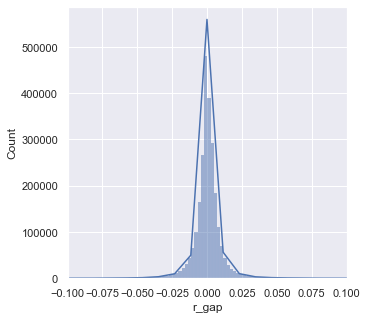

In [6]:
sns.set(rc={'figure.figsize':(5,5)})
fig = plt.figure()
ax = plt.axes()
sns.histplot(data["r_gap"], bins=1000,kde=True)
plt.xlim(-0.1, 0.1)
plt.show()

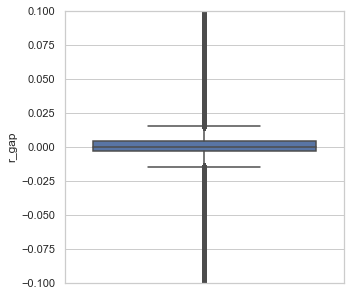

In [34]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=data["r_gap"])
plt.ylim(-0.1, 0.1)
plt.show()

RENDIMIENTO INTRADARIO

(-0.1, 0.1)

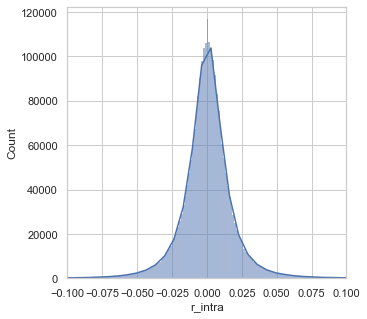

In [8]:
fig = plt.figure()
ax = plt.axes()
sns.histplot(data["r_intra"], bins=1000, kde=True)
plt.xlim(-0.1, 0.1)

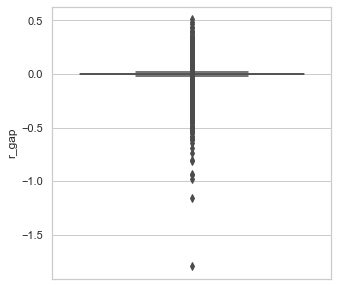

In [9]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=data["r_gap"])

Variación

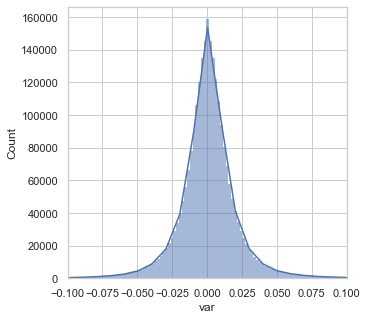

In [10]:
fig = plt.figure()
ax = plt.axes()
sns.histplot(data["var"], bins=1000, kde=True)
plt.xlim(-0.1, 0.1)
plt.show()

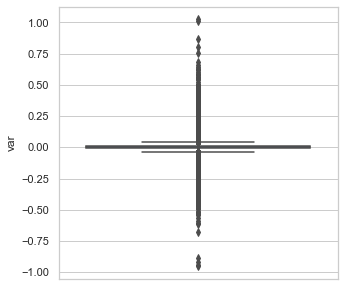

In [11]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=data["var"])

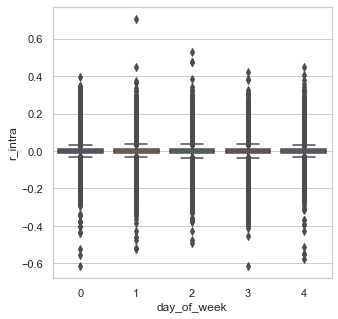

In [12]:
ax = sns.boxplot(x="day_of_week", y="r_intra", data=data)

¿Cual es el mejor día para invertir teniendo en cuenta el retorno de los movimiento gap?

In [13]:
data.r_gap= data.r_gap.astype("float")

In [14]:
data4= data.groupby('day_of_week')['r_gap'].mean().reset_index()

In [15]:
dias_semanas = {'Lunes':0,'Martes':1 ,'Miercoles':2 ,'Jueves': 3, 'Viernes': 4}
data4['dias_semanas'] = dias_semanas

In [16]:
data4.sort_values('r_gap', ascending=False)

,day_of_week,r_gap,dias_semanas
1,1,0.000578,Martes
4,4,0.000223,Viernes
2,2,0.000115,Miercoles
3,3,0.000057,Jueves
0,0,0.000041,Lunes


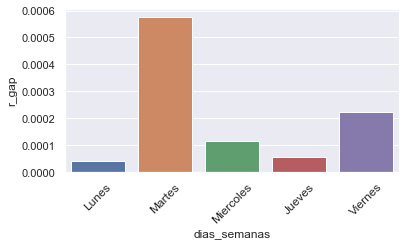

In [17]:
sns.set(rc={'figure.figsize':(6,3)})
plt.xticks(fontsize=12,rotation=45)
sns.barplot(data = data4, x='dias_semanas', y='r_gap')
plt.show()
#Compraria el lunes porque el martes abre alto

¿Cual es el mejor día para invertir teniendo en cuenta el retorno de los movimientos intradiarios?

In [18]:
data5= data.groupby('day_of_week')['r_intra'].mean().reset_index()
data5['dias_semanas'] = dias_semanas

In [19]:
data5.sort_values('r_intra',ascending=False )
#El dia con mejor rendimiento intradiario es el jueves.

,day_of_week,r_intra,dias_semanas
3,3,0.000520,Jueves
4,4,0.000250,Viernes
2,2,0.000239,Miercoles
1,1,0.000187,Martes
0,0,-0.000307,Lunes


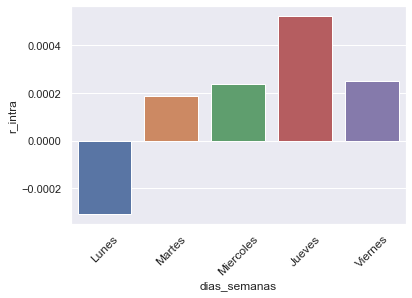

In [20]:
sns.set(rc={'figure.figsize':(6,4)})
plt.xticks(fontsize=12,rotation=45)
sns.barplot(data = data5, x='dias_semanas', y='r_intra')
plt.show()
#Compraria el jueves a la mañana 

¿Cuales son las mejores industrias que pertenecen al SP500 en las cuales se puede invertir?

Mi criterio va a ser ver la cantidad de empresas por sector, los sectores con más empresas serán los elegidos para invertir.

In [21]:
train_set2 = data[data["Date"] > '2021-12-30']
distribucion  =  train_set2.GICS.value_counts().reset_index()
distribucion["Porcentaje"] = distribucion.apply(lambda row: (row.GICS*100/502), axis = 1).fillna(0)


In [22]:
distribucion

,index,GICS,Porcentaje
0,Information Technology,74,14.741036
1,Industrials,73,14.541833
2,Financials,66,13.147410
3,Health Care,64,12.749004
4,Consumer Discretionary,58,11.553785
5,Consumer Staples,33,6.573705
6,Real Estate,31,6.175299
7,Utilities,28,5.577689
8,Materials,28,5.577689
9,Communication Services,26,5.179283


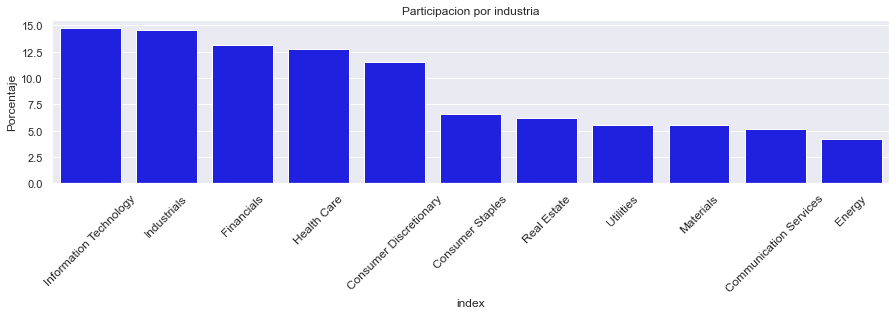

In [23]:
sns.set(rc={'figure.figsize':(15,3)})
plt.xticks(fontsize=12,rotation=45)
sns.barplot(data = distribucion, x='index', y='Porcentaje', color="blue").set(title="Participacion por industria")
plt.show()

Las empresas que mayor participación tienen en el índice son las IT, seguido por Industrials y financials. Recomendaría invertir en el top 5 de estas categorías.

¿Cuáles fueron los momentos de alta volatilidad que afectaron al SP500?

In [24]:
data_volatil = data.copy()

In [25]:
data_volatil.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,day_of_week,r_intra,r_gap,var,var log,Volatility
0,2000-01-03 00:00:00,48.03125,48.25000,47.03125,47.1875,26.434853,2173400.0,MMM,Industrials,0,-0.017723,0.000000,0.000000,0.000000,0.0
1,2000-01-04 00:00:00,46.43750,47.40625,45.31250,45.3125,25.384460,2713800.0,MMM,Industrials,1,-0.024524,-0.016022,-0.039735,-0.040546,0.0


In [26]:
data_volatil2= data_volatil.groupby('Date')['var'].mean().reset_index()
data_volatil2["var"].max()

0.11578084590863286

In [27]:
data_volatil2.loc[data_volatil2['var'] == data_volatil2["var"].max()]

,Date,var
5089,2020-03-24 00:00:00,0.115781


In [28]:
data_volatil2.loc[data_volatil2['var'] == data_volatil2["var"].min()]

,Date,var
5083,2020-03-16 00:00:00,-0.126881


El periodo más volátil fue marzo de 2020, teniendo los picos de variación, tanto positiva como negativa.

In [29]:
dataprueba2 = data_volatil.groupby("Date").agg({ 'Open':'mean', 'High':'mean', 'Low':'mean', 'Close':'mean', 'Adj Close':'mean','r_intra':'mean', 'r_gap':'mean', 'var':'mean'})
dataprueba2 = dataprueba2.reset_index()

Lo siguiente es una foto

![](grafico.png)

Lo siguiente es el codigo

In [30]:
fig = px.line(dataprueba2, x='Date', y="var", color_discrete_sequence=["green"])
fig.show()

En los gráficos anteriores se ve como fue evolucionando la volatilidad a través de los años, se pueden observar periodos turbulentos en el año 2008, de más larga duración, y en el 2020 se observa un periodo más volátil pero más corto.

¿Cuales son las 9 mejores empresas para invertir?

El perfil de la empresa es cuidar su dinero, buscaremos acciones que más crecieron en los últimos 6 meses.

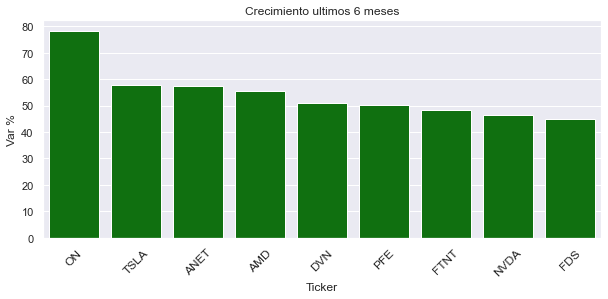

In [31]:
data_top_9 = data.copy()
data_parcial = data_top_9[data_top_9["Date"] >= '2021-07-01 00:00:00']
data_parcial=data_parcial.drop(["Open","High","Low","Close","Volume","GICS","day_of_week","r_intra","r_gap","var","var log","Volatility"], axis=1)
data_parcial_min = data_parcial[data_parcial["Date"] == data_parcial["Date"].min()]
data_parcial_max = data_parcial[data_parcial["Date"] == data_parcial["Date"].max()]
data_parcial_dif = pd.merge(data_parcial_min,data_parcial_max, on=["Ticker"])
data_parcial_dif["Var %"] = data_parcial_dif.apply(lambda row: (((row["Adj Close_y"]/row["Adj Close_x"])-1)*100), axis = 1).fillna(0)
data_parcial_dif = data_parcial_dif.sort_values("Var %", ascending=False)
data_parcial_dif = data_parcial_dif.head(9)
data_parcial_dif = data_parcial_dif.drop(["Date_x","Adj Close_x","Date_y","Adj Close_y"], axis=1)
sns.set(rc={'figure.figsize':(10,4)})
plt.xticks(fontsize=12,rotation=45)
sns.barplot(data = data_parcial_dif, x='Ticker', y='Var %', color="green").set(title="Crecimiento ultimos 6 meses")
plt.show()